In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


/home/guts/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = "/home/guts/Documents/accel_data/acceleration_data.csv"
df = pd.read_csv(path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,Acceleration
0,2024-08-09 14:23:41,10.110164
1,2024-08-09 14:23:42,9.555678
2,2024-08-09 14:23:44,9.325334
3,2024-08-09 14:23:48,9.532025
4,2024-08-09 14:23:49,9.468498
...,...,...
18662,2024-08-10 01:05:10,9.490646
18663,2024-08-10 01:05:13,10.447052
18664,2024-08-10 01:05:15,9.073947
18665,2024-08-10 01:05:16,10.054511


In [5]:
# Data Preprocessing
df = df.set_index('Timestamp')
df = df.resample('1S').mean()
df = df.dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled





,Acceleration
Timestamp,
2024-08-09 14:23:41,0.634062
2024-08-09 14:23:42,-0.603517
2024-08-09 14:23:44,-1.117629
2024-08-09 14:23:48,-0.656308
2024-08-09 14:23:49,-0.798096
...,...
2024-08-10 01:05:10,-0.748663
2024-08-10 01:05:13,1.385975
2024-08-10 01:05:15,-1.678710


In [26]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(df_scaled)
df['Cluster'] = kmeans.labels_

df['Cluster'].value_counts()



Cluster
0    4722
4    3255
5    3016
7    2487
1    1897
2    1593
3    1037
6     361
8     299
Name: count, dtype: int64

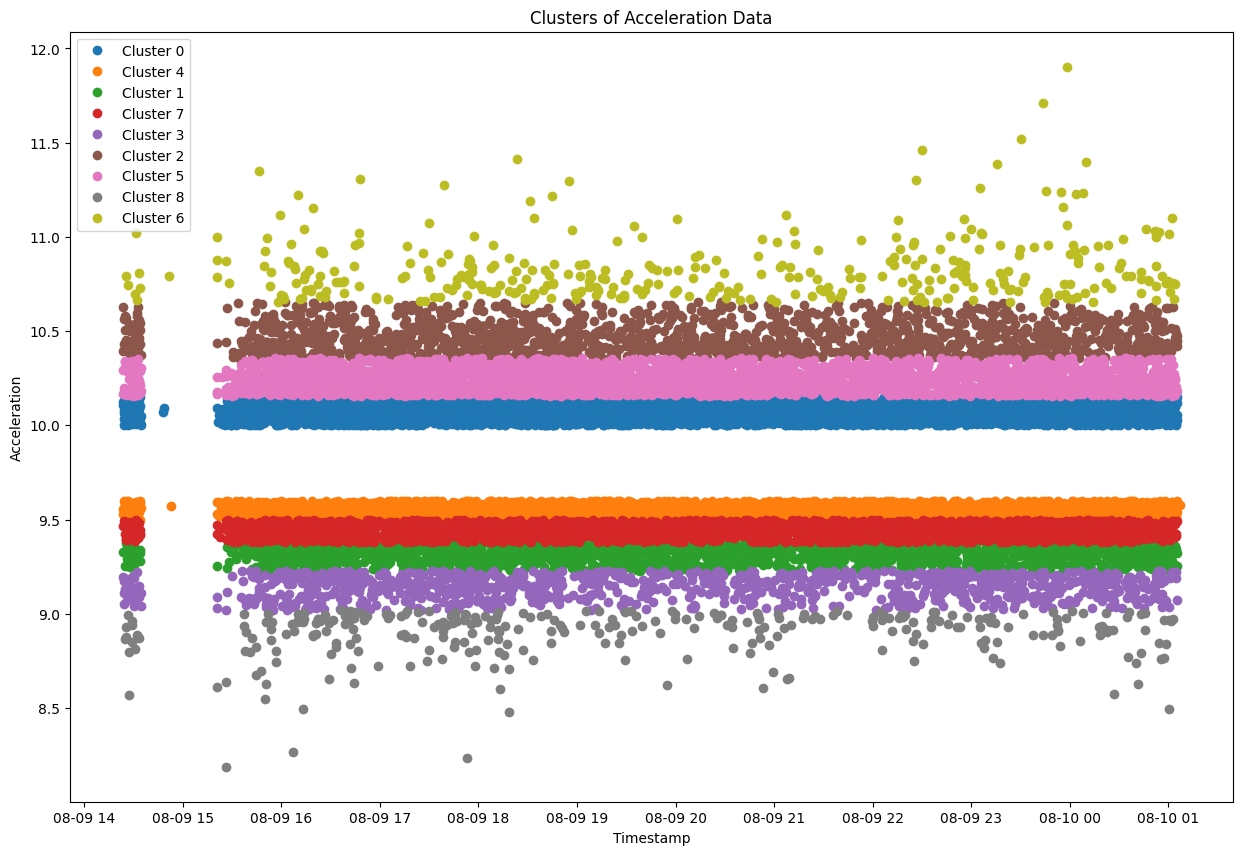

In [27]:

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
for cluster in df['Cluster'].unique():
    plt.plot(df[df['Cluster'] == cluster].index, df[df['Cluster'] == cluster]['Acceleration'], marker='o', linestyle='', label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters of Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [28]:
cluster_list=df['Cluster'].value_counts()
cluster_list.index


Index([0, 4, 5, 7, 1, 2, 3, 6, 8], dtype='int32', name='Cluster')

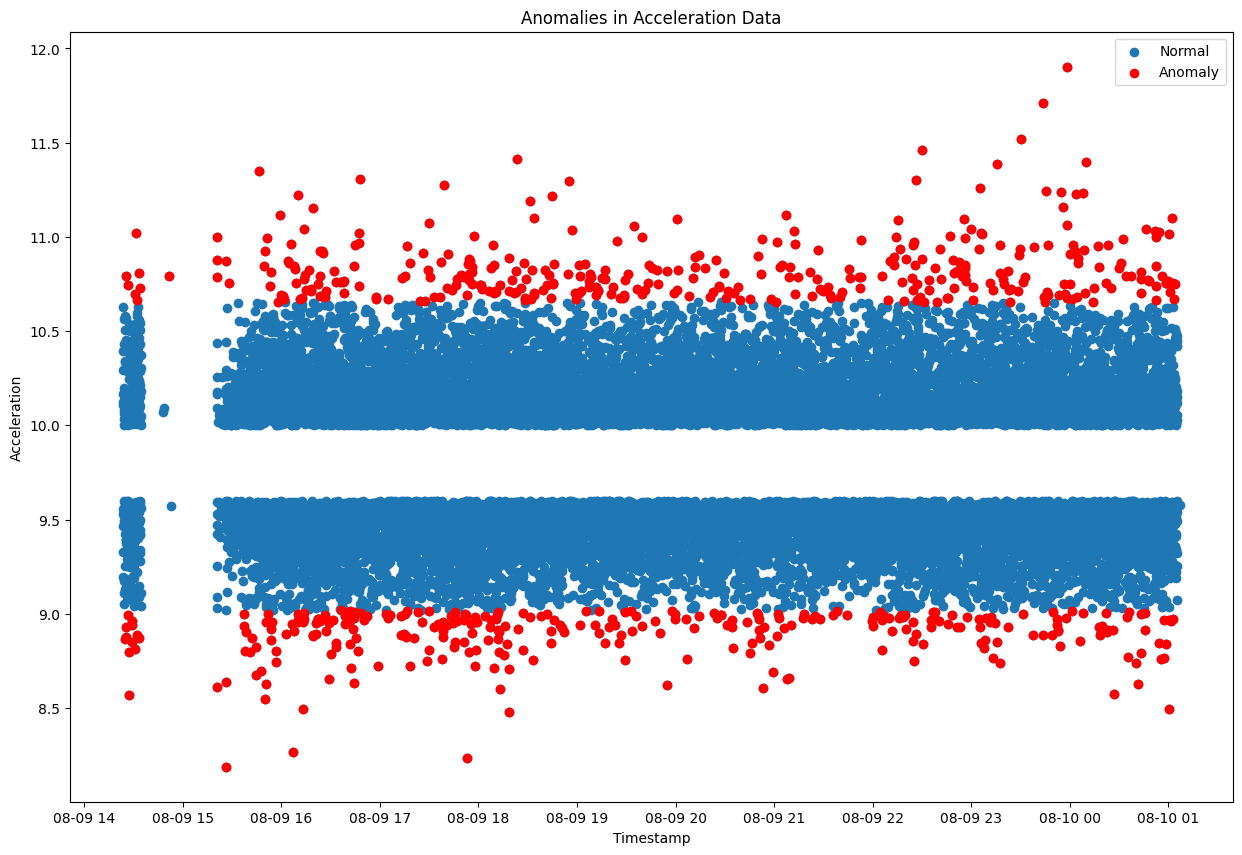

In [29]:



anomalies = df[(df['Cluster'] == cluster_list.index[-1]) | (df['Cluster'] == cluster_list.index[-2]) ]

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(df.index, df['Acceleration'], label='Normal')
plt.scatter(anomalies.index, anomalies['Acceleration'], label='Anomaly', color='r')
plt.legend()
plt.title('Anomalies in Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [30]:
healthy = df[~df.index.isin(anomalies.index)]
print(f'Number of anomalies: {len(anomalies)}')
print(f'Number of healthy data points: {len(healthy)}')
print(f'Percentage of anomalies: {len(anomalies) / len(df) * 100:.2f}%')

Number of anomalies: 660
Number of healthy data points: 18007
Percentage of anomalies: 3.54%
